# Estabilizando rede neurais - Batch Normalization

### Problemas com redes profundas

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

def conv3x3(in_channels, out_channels):
    """Cria camada convolucional com filtro de tamanho 3 e sem bias."""
    return nn.Conv2d(in_channels, 
                     out_channels, 
                     kernel_size = 3,
                     padding = 1, 
                     bias = False)

class Model(nn.Module):
    '''Modelo com `num_layers` camadas convolucionais, cada uma com `num_channels` canais.'''
    def __init__(self, num_layers, num_channels):
        super().__init__()
        
        layers = [
            conv3x3(1, num_channels),
            # ReLU é a função de ativação. Ela zera valores negativos, tornando a 
            # rede neural mais eficiente, que aprenda padrões mais complexos,
            # diminuindo o vanish gradient.
            nn.ReLU()
        ]
        for idx in range(1, num_layers):
            layers.append(conv3x3(num_channels, num_channels))
            layers.append(nn.ReLU())

        # É necessário adicionar as camadas dentro do ModuleList, para que o PyTorch entenda isso como camadas
        # e parametros. Sem isso, o otimização dará problema.
        self.layers = nn.ModuleList(layers)

        # Ajusta saída de 1x1, deixando a cargo da Rede Neural (NN) adaptar os parâmetros internos
        self.pool = nn.AdaptiveMaxPool2d(1)

        # FC = Fully Connected
        # Camada linear que recebe entrada de tamanho features e gera 10 valores de saída
        self.fc = nn.Linear(num_channels, 10)

    def forward(self, x):
        '''Além de calcular o resultado, este método retorna as ativações
        intermediárias da rede.'''
        acts = []
        for layer in self.layers:
            x = layer(x)
            acts.append(x)

        x = self.pool(x)

        # Transformação das imagens de tamanho bs x features x 1 x 1 para bs x features
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x, acts
    
model = Model(10, 16)

# Desabilita cálculo de gradientes, pois não será usado neste notebook
model.requires_grad_(False)
model

Model(
  (layers): ModuleList(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): ReLU()
    (8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU()
    (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (11): ReLU()
    (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): ReLU()
    (14): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (15): ReLU()
    (16): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (17): ReLU()
    (18): Conv2d(16, 16, kernel_siz

Execute a célula abaixo diversas vezes com ctrl+enter. A saída da rede é sempre a mesma!

In [2]:
# rand() retorna números aleatórios, entre 0 e 1, onde:
# 1: batch size
# 1: número de canais (imagem em escala de cinza)
# 28, 28: tamanho da imagem. O mesmo usado para o dataset MNIST
x = torch.rand(1, 1, 28, 28)
print(x)
y, acts = model(x)

print(x[0,0,0])
print(y)

tensor([[[[5.5132e-01, 9.2182e-02, 3.4766e-01, 4.6120e-01, 7.1061e-01,
           9.4458e-01, 8.5787e-01, 5.7747e-01, 1.0347e-01, 6.8725e-01,
           4.9610e-01, 1.8163e-01, 1.2905e-01, 5.2382e-01, 8.0277e-01,
           9.1036e-01, 4.8729e-01, 4.7766e-01, 6.8734e-01, 5.0653e-01,
           4.2477e-01, 1.6121e-01, 9.1011e-01, 7.3330e-01, 6.7073e-01,
           8.7061e-01, 7.7629e-02, 2.4512e-01],
          [5.6668e-01, 2.9699e-01, 6.3261e-01, 9.8459e-01, 8.3876e-02,
           3.2608e-01, 6.7757e-01, 6.9928e-01, 4.1459e-01, 1.4536e-01,
           2.4381e-01, 3.6337e-01, 6.2453e-01, 4.9926e-01, 4.6512e-01,
           7.6876e-02, 2.9985e-03, 9.0324e-01, 8.7338e-02, 1.5715e-01,
           8.4156e-04, 6.8754e-01, 8.7722e-01, 2.7529e-01, 5.3823e-02,
           5.8999e-01, 5.2057e-02, 6.3285e-01],
          [8.8081e-01, 1.5229e-01, 6.9976e-01, 6.6287e-01, 8.2993e-01,
           9.3495e-01, 9.9753e-01, 6.6614e-01, 7.1341e-01, 5.1803e-01,
           5.0974e-01, 7.0942e-01, 8.6978e-01, 9.185

A saída da rede é dada apenas pelo bias da última camada:

In [3]:
print(y)
print(model.fc.bias)

tensor([[ 0.2178, -0.1092,  0.2456, -0.0371, -0.2153,  0.0555, -0.0775,  0.0808,
          0.2372,  0.1859]])
Parameter containing:
tensor([ 0.2178, -0.1092,  0.2457, -0.0371, -0.2153,  0.0554, -0.0775,  0.0808,
         0.2372,  0.1859])


Plotando a média e desvio padrão das ativações intermediárias da rede, vemos que os valores caem para zero:

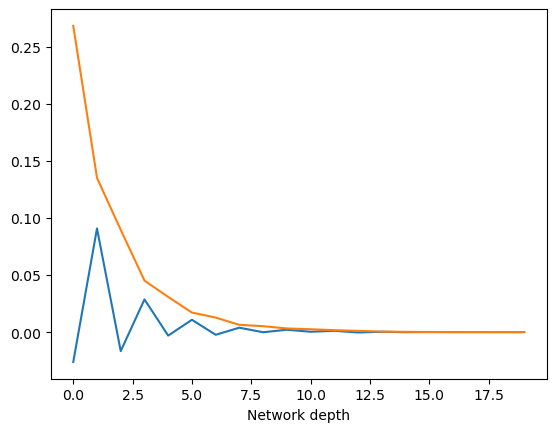

In [4]:
def show_activations(acts):
    act_mean = []
    act_std = []
    for act in acts:
        act = act.detach()
        act_mean.append(act.mean())
        act_std.append(act.std())

    plt.plot(act_mean)
    plt.plot(act_std)
    plt.xlabel('Network depth')

show_activations(acts)

Essencialmente, a operação que uma rede neural faz é dada por:

In [5]:
# Batch de dados
x = torch.rand(10)

# Parâmetros das camadas
weight = 2.
bias = 2.

# 100 camadas
for i in range(100):
    x = weight * x + bias

print(x)

tensor([3.4363e+30, 3.2546e+30, 3.0196e+30, 3.7422e+30, 3.0567e+30, 3.0390e+30,
        3.4760e+30, 2.7025e+30, 2.5884e+30, 2.6365e+30])


Tente achar valores de `weight` e `bias` que não levem o valor de x acima a 0, infinito ou algum valor trivial.

### Batch Normalization

Ao normalizarmos os valores, as ativações se tornam bem comportadas!

In [6]:
def normalization(x):
    mean = x.mean() # mean = mediana
    std = x.std() # std (standard deviation) = desvio padrao
    return (x - mean) / std

# Batch de dados
x = torch.rand(10)

# Parâmetros das camadas
weight = 20.
bias = -10.

for i in range(10):
    x = weight * x + bias
    x = normalization(x)

print(x)

tensor([ 0.2996, -1.0784,  1.9673, -1.1254,  0.4581,  0.6245, -1.0376,  0.7002,
        -0.6459, -0.1626])


Mas e se a escala dos valores for relevante para a classificação? Por exemplo, talvez um filtro tenda a gerar valores em torno de 10, enquanto que outro filtro gere valores em torno de 0.1. Essa informação será perdida após a normalização.

Uma camada batchnorm permite reescalar os valores caso seja necessário. Os parâmetros de escala são aprendidos durante o treinamento.

In [7]:
class BatchNorm(nn.Module):
    def __init__(self):
        super().__init__()

        # nn.Parameter define um tensor com requires_grad=True e que é registrado 
        # como parâmetro treinável do modelo
        self.weight = nn.Parameter(torch.tensor(1.))
        self.bias = nn.Parameter(torch.tensor(0.))

        self.eps = 1e-5

    def forward(self, x):
        mean = x.mean()
        var = x.var() # Variância

        # eps evita divisão por 0
        x_norm = (x - mean) / torch.sqrt(var + self.eps)

        # Reescala os valores
        y = self.weight * x_norm + self.bias

        return y
    
bn = BatchNorm()
bn(100 * torch.rand(10))


tensor([ 1.7618, -0.7297, -0.4407,  0.3476, -0.1991,  1.3330,  0.0378,  0.3371,
        -0.9777, -1.4700], grad_fn=<AddBackward0>)

Mas temos um problema. E quando formos aplicar a rede após o treinamento em uma única imagem? Cada camada terá apenas uma única ativação, o que pode ser um problema. Para evitar isso, durante o treinamento podemos armazenar a média e desvio padrão de todos os batches, e usar a estimativa desses parâmetros de todos os batches para normalizar os valores ao aplicar em uma única imagem.

### Desvendando a camada BatchNorm do Pytorch

In [8]:
# Batchnorm aplicado em 3 canais
bn = nn.BatchNorm2d(3)
print(bn.weight)
print(bn.bias)

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


A longo de vários batches, a camada estima a média e variância dos dados:

In [9]:
# Cria batches artificiais possuindo 4 imagens cada. Cada imagem possui 3 canais
# e tamanho 256x256. Os valores das imagens são aleatórios com média 10 e
# desvio padrão 2
bs = 4
img_shape = (3, 256, 256)
batches = []
for idx in range(100):
    batch = torch.normal(mean = 10, 
                         std = 2, 
                         size = (bs, *img_shape))
    batches.append(batch)

for batch in batches:
    _ = bn(batch)
    print('mean', bn.running_mean, 'var', bn.running_var)



mean tensor([1.0002, 1.0000, 1.0003]) var tensor([1.3010, 1.2981, 1.2992])
mean tensor([1.9007, 1.9003, 1.9003]) var tensor([1.5711, 1.5682, 1.5675])
mean tensor([2.7117, 2.7103, 2.7098]) var tensor([1.8151, 1.8109, 1.8097])
mean tensor([3.4406, 3.4387, 3.4391]) var tensor([2.0328, 2.0331, 2.0285])
mean tensor([4.0961, 4.0941, 4.0953]) var tensor([2.2299, 2.2315, 2.2254])
mean tensor([4.6870, 4.6842, 4.6861]) var tensor([2.4057, 2.4096, 2.4043])
mean tensor([5.2184, 5.2156, 5.2175]) var tensor([2.5640, 2.5683, 2.5638])
mean tensor([5.6964, 5.6943, 5.6962]) var tensor([2.7057, 2.7108, 2.7061])
mean tensor([6.1255, 6.1252, 6.1271]) var tensor([2.8347, 2.8391, 2.8347])
mean tensor([6.5130, 6.5121, 6.5140]) var tensor([2.9515, 2.9549, 2.9509])
mean tensor([6.8612, 6.8596, 6.8624]) var tensor([3.0559, 3.0586, 3.0561])
mean tensor([7.1746, 7.1738, 7.1762]) var tensor([3.1499, 3.1509, 3.1522])
mean tensor([7.4583, 7.4563, 7.4585]) var tensor([3.2356, 3.2363, 3.2367])
mean tensor([7.7127, 7.71

Os valores de `running_mean` e `running_var` são utilizados para normalizar os dados. 

No modo eval, a média estimada é usada quando a camada for aplicada em novos dados:

In [10]:
# Imagem com média 15 e desvio padrão 2
x = torch.normal(mean = 15, 
                 std = 2, 
                 size = (1, 3, 256, 256))

# Para de treinar o modelo, deixando-o em modo de "avaliação"
bn.eval()
y = bn(x)

# A média do resultado deve ser aproximadamente (15-bn.running_mean)/bn.running_var**0.5
print(y.mean())

tensor(2.5014, grad_fn=<MeanBackward0>)


Retornando o batchnorm para o modo .train faz com que a camada volte a normalizar pela média e desvio do batch:

In [11]:
bn.train()
y = bn(x)
print(y.mean())

tensor(8.8476e-08, grad_fn=<MeanBackward0>)
